In [1]:
import numpy
import math
import matplotlib.pyplot as plt
import scipy.special

Maclaurin series for $\sin(x)$ is:
\begin{align}
\sin(x)
&= \sum_{k=0}^{\infty} \frac{ (-1)^k }{ (2k+1)! } x^{2k+1} \\
&= x - \frac{1}{3!} x^3 + \frac{1}{5!} x^5 - \frac{1}{7!} x^7 + \frac{1}{9!} x^9 - \frac{1}{11!} x^{11} +\ldots \\
%%% &= x \left( 1 - \frac{1}{2.3} x^2 \left( 1 - \frac{1}{4.5} x^2 \left( 1 - \frac{1}{6.7} x^2 \left(1 - \frac{1}{8.9} x^2 \left( 1 - \frac{1}{10.11} x^{2} \left( \ldots \right) \right) \right) \right) \right) \right) \\
&= x \left( 1 - \frac{1}{2.3} x^2 \right) + \frac{1}{5!} x^5 \left( 1 - \frac{1}{6.7} x^2 \right)
     + \frac{1}{9!} x^9 \left( 1 - \frac{1}{10.11} x^2 \right) + \ldots \\
&= \sum_{k=0}^{\infty} \frac{x^{4k+1}}{(4k+1)!} \left( 1 - \frac{x^2}{(4k+2)(4k+3)} \right) \\
&= x \sum_{k=0}^{\infty} \frac{x^{4k}}{(4k+1)!} \left( 1 - \frac{x^2}{(4k+2)(4k+3)} \right)
\end{align}
The roundoff error is associated with the addition/subtraction involving the largest term which (for $|x|<6$) will be the first term, so of order $|x|\epsilon$.

epsilon = 2.22e-16 = 2**-52


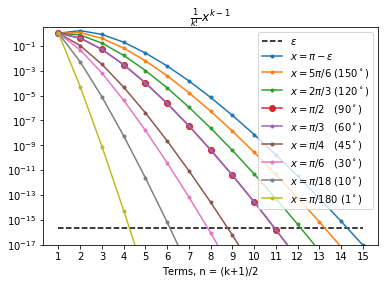

In [2]:
# Significance of each term to leading term
k, eps = numpy.arange(1,30,2), numpy.finfo(float).eps
n = (k+1)/2
print('epsilon = %.2e'%eps, "= 2**%i"%int(math.log(eps)/math.log(2)))
plt.semilogy(n, eps * (1+0*n), 'k--', label=r'$\epsilon$' )
plt.semilogy(n, (numpy.pi-eps)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=\pi-\epsilon$' );
plt.semilogy(n, (numpy.pi/6*5)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=5\pi/6$ (150$^\circ$)' );
plt.semilogy(n, (numpy.pi/3*2)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=2\pi/3$ (120$^\circ$)' );
plt.semilogy(n, (numpy.pi/2)**(k-1) / scipy.special.factorial(k), 'o-', label=r'$x=\pi/2$   (90$^\circ$)' );
plt.semilogy(n, (numpy.pi/2)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=\pi/3$   (60$^\circ$)' );
plt.semilogy(n, (numpy.pi/4)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=\pi/4$   (45$^\circ$)' );
plt.semilogy(n, (numpy.pi/6)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=\pi/6$   (30$^\circ$)' );
plt.semilogy(n, (numpy.pi/18)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=\pi/18$ (10$^\circ$)' );
plt.semilogy(n, (numpy.pi/180)**(k-1) / scipy.special.factorial(k), '.-', label=r'$x=\pi/180$ (1$^\circ$)' );
plt.gca().set_xticks(numpy.arange(1,16)); plt.legend(); plt.xlabel('Terms, n = (k+1)/2'); plt.ylim(1e-17,3);
plt.title(r'$\frac{1}{k!}x^{k-1}$');

\begin{align}
\sin(x)
&\approx x - \frac{1}{3!} x^3 + \frac{1}{5!} x^5 - \frac{1}{7!} x^7 + \frac{1}{9!} x^9 - \frac{1}{11!} x^{11} +\ldots \\
&= x \left( 1 - \frac{1}{2.3} x^2 \left( 1 - \frac{1}{4.5} x^2 \left( 1 - \frac{1}{6.7} x^2 \left(1 - \frac{1}{8.9} x^2 \left( 1 - \frac{1}{10.11} x^{2} \left( \ldots \right) \right) \right) \right) \right) \right) \\
&= x \left( 1 - c_1 x^2 \left( 1 - c_2 x^2 \left( 1 - c_3 x^2 \left(1 - c_4 x^2 \left( 1 - c_5 x^{2} \left( \ldots \right) \right) \right) \right) \right) \right) \;\;\mbox{where}\;\; c_j = \frac{1}{2j(2j+1)}
\end{align}


In [3]:
# Coefficients in series
print(' t',' k','%26s'%'(2k+1)!','%22s'%'1/(2k+1)!','1/c[t]','%21s'%'c[t]')
for t in range(1,14):
    k=2*t-1
    print('%2i'%t, '%2i'%k, '%26i'%math.factorial(k), '%.16e'%(1./math.factorial(k)),'%5i'%(2*t*(2*t+1)),'%.16e'%(1./(2*t*(2*t+1))))

 t  k                    (2k+1)!              1/(2k+1)! 1/c[t]                  c[t]
 1  1                          1 1.0000000000000000e+00     6 1.6666666666666666e-01
 2  3                          6 1.6666666666666666e-01    20 5.0000000000000003e-02
 3  5                        120 8.3333333333333332e-03    42 2.3809523809523808e-02
 4  7                       5040 1.9841269841269841e-04    72 1.3888888888888888e-02
 5  9                     362880 2.7557319223985893e-06   110 9.0909090909090905e-03
 6 11                   39916800 2.5052108385441720e-08   156 6.4102564102564100e-03
 7 13                 6227020800 1.6059043836821613e-10   210 4.7619047619047623e-03
 8 15              1307674368000 7.6471637318198164e-13   272 3.6764705882352941e-03
 9 17            355687428096000 2.8114572543455206e-15   342 2.9239766081871343e-03
10 19         121645100408832000 8.2206352466243295e-18   420 2.3809523809523812e-03
11 21       51090942171709440000 1.9572941063391263e-20   506 1.9

\begin{align}
\sin(x)
&\approx x - \frac{1}{3!} x^3 + \frac{1}{5!} x^5 - \frac{1}{7!} x^7 + \frac{1}{9!} x^9 - \frac{1}{11!} x^{11} +\ldots \\
&= x \left( 1 - \frac{1}{2.3} x^2 \right) + \frac{1}{5!} x^5 \left( 1 - \frac{1}{6.7} x^2 \right)
     + \frac{1}{9!} x^9 \left( 1 - \frac{1}{10.11} x^2 \right) + \ldots \\
&= \sum_{l=0}^{\infty} \frac{x^{4l+1}}{(4l+1)!} \left( 1 - \frac{x^2}{(4l+2)(4l+3)} \right) \\
&= \sum_{l=0}^{\infty} \frac{x^{4l+1}}{a_l} \left( 1 - \frac{x^2}{b_l} \right)
\;\;\mbox{where}\;\; a_l=(4l+1)! \;\;\mbox{and}\;\; b_l=(4l+2)(4l+3) \\
&= x \sum_{l=0}^{\infty} \frac{x^{4l}}{(4l+1)!} \left( 1 - \frac{x^2}{(4l+2)(4l+3)} \right) \\
&= x \sum_{l=0}^{\infty} \frac{x^{4l}}{a_l} \left( 1 - \frac{x^2}{b_l} \right) \\
&= x \sum_{l=0}^{\infty} f_l \left( 1 - g_l \right)
\;\;\mbox{where}\;\; f_l=\frac{x^{4l}}{a_l} \;\;\mbox{and}\;\; b_l=\frac{x^2}{b_l}
\end{align}
Note that
\begin{align}
a_l &= a_{l-1} (4l+1) 4l (4l-1) (4l-2) \;\; \forall \; l = 2,3,\ldots \\
f_l
&= \frac{x^{4l}}{a_l} \\
&= \frac{x^{4l-4}x^4}{a_{l-1} (4l+1) 4l (4l-1) (4l-2)} \\
&= \frac{x^4}{(4l+1) 4l (4l-1) (4l-2)} f_{l-1}
\end{align}

In [4]:
# Coefficients in paired series
print(' l','4l+1','%26s'%'a[l]=(4l+1)!','%22s'%'1/a[l]',' b[l]','%22s'%'1/b[l]')
for l in range(0,7,1):
    print('%2i'%l, '%4i'%(4*l+1), '%26i'%math.factorial(4*l+1), '%.16e'%(1./math.factorial(4*l+1)),
          '%5i'%((4*l+2)*(4*l+3)),'%.16e'%(1./((4*l+2)*(4*l+3))))

 l 4l+1               a[l]=(4l+1)!                 1/a[l]  b[l]                 1/b[l]
 0    1                          1 1.0000000000000000e+00     6 1.6666666666666666e-01
 1    5                        120 8.3333333333333332e-03    42 2.3809523809523808e-02
 2    9                     362880 2.7557319223985893e-06   110 9.0909090909090905e-03
 3   13                 6227020800 1.6059043836821613e-10   210 4.7619047619047623e-03
 4   17            355687428096000 2.8114572543455206e-15   342 2.9239766081871343e-03
 5   21       51090942171709440000 1.9572941063391263e-20   506 1.9762845849802370e-03
 6   25 15511210043330985984000000 6.4469502843844736e-26   702 1.4245014245014246e-03


In [5]:
def sin_map_x( x ):
    ninety = numpy.pi/2
    one_eighty = numpy.pi
    three_sixty = 2.*numpy.pi
    fs = 1.
    if x < -ninety:
        x = -one_eighty - x
    if x > three_sixty:
        n = int(x / three_sixty)
        x = x - n*three_sixty
    if x >= one_eighty:
        x = x - one_eighty
        fs = -1.
    if x > ninety:
        x = one_eighty - x
    return x,fs
def sin_forward_series( x ):
    # Adds terms from largest to smallest until answer is not changing
    x,fs = sin_map_x( x )
    # https://en.wikipedia.org/wiki/Sine#Series_definition
    ro,d,s = 1.,1,-1.
    for k in range(3,200,2):
        d = d * (k-1) * k
        f = 1. / d
        r = ro + x**(k-1) * f * s
        if r==ro: break
        ro,s = r, -s
    return ( r * x ) * fs
def sin_reverse_series( x ):
    # Adds terms from smallest to largest after finding smallest term to add
    x,fs = sin_map_x( x )
    ro,s,d = 1.,-1.,1
    for k in range(3,200,2):
        d = d * (k-1) * k
        f = 1. / d
        r = ro + x**(k-1) * f * s
        if r==ro: break
        ro,s = r, -s
    ro = 0.
    for j in range(k,0,-2):
        f = 1./ math.factorial(j)
        r = ro + x**(j-1) * f * s
        if r==ro: break
        ro,s = r, -s
    return ( r * x ) * fs
def sin_reverse_series_fixed( x ):
    # Adds terms from smallest to largest for fixed number of terms
    x,fs = sin_map_x( x )
    ro,s,d,x2,N = 1.,-1.,1,1.,16
    term = [1.] * (N)
    for n in range(1,N):
        x2 = x2 * ( x * x )
        k = 2*n+1
        d = d * (k-1) * k
        f = 1. / d
        #term[n] = x**(k-1) * f * s 
        term[n] = x2 * f * s 
        r = ro + term[n]
        if r==ro: break
        ro,s = r, -s
    r = 0.
    for j in range(n,-1,-1):
        r = r + term[j]
    return ( r * x ) * fs
def sin_reverse_precomputed( x ):
    # Adds fixed number of terms from smallest to largest with precomputed coefficients
    x,fs = sin_map_x( x )
    C=[0.16666666666666667,
       0.05,
       0.023809523809523808,
       0.013888888888888889,
       0.009090909090909091,
       0.00641025641025641,
       0.004761904761904762,
       0.003676470588235294,
       0.0029239766081871343,
       0.002380952380952381,
       0.001976284584980237,
       0.0016666666666666667,
       0.0014245014245014246,
       0.0012315270935960591,
       0.001075268817204301,
       0.000946969696969697,
       0.0008403361344537816,
       0.0007507507507507507,
       0.0006747638326585695]
    n = len(C)
    f,r,s = [1.]*(n),0.,1.
    if n%2==0: s=-1.
    for i in range(1,n):
        f[i] = f[i-1] * C[i-1]
    for i in range(n-1,0,-1):
        k = 2*i + 1
        r = r + x**k * f[i] * s
        s = -s
    r = r + x
    return r * fs
def sin_by_series(x, n=20, verbose=False, method='accurate-explicit'):
    """Returns sin(x)"""
    if method=='forward-explicit': return sin_forward_series( x )
    elif method=='reverse-explicit': return sin_reverse_series( x )
    elif method=='reverse-fixed': return sin_reverse_series_fixed( x )
    elif method=='reverse-precomputed': return sin_reverse_precomputed( x )
    x,fs = sin_map_x( x )
    # https://en.wikipedia.org/wiki/Sine#Series_definition
    C=[0.16666666666666667,
       0.05,
       0.023809523809523808,
       0.013888888888888889,
       0.009090909090909091,
       0.00641025641025641,
       0.004761904761904762,
       0.003676470588235294,
       0.0029239766081871343,
       0.002380952380952381,
       0.001976284584980237,
       0.0016666666666666667,
       0.0014245014245014246,
       0.0012315270935960591,
       0.001075268817204301,
       0.000946969696969697,
       0.0008403361344537816,
       0.0007507507507507507,
       0.0006747638326585695]
    if method=='forward-explicit':
        # Adds terms from largest to smallest until answer is not changing
        ro,f,s = 1.,1.,-1.
        for k in range(3,200,2):
            f = 1./ math.factorial(k)
            r = ro + x**(k-1) * f * s
            if verbose: print('sine:',r*x,'(%i)'%k)
            if r==ro: break
            ro,s = r, -s
        r = r * x
    elif method=='reverse-explicit':
        # Adds terms from smallest to largest after finding smallest term to add
        ro,s = 1.,-1.
        for k in range(3,200,2):
            f = 1./ math.factorial(k)
            r = ro + x**(k-1) * f * s
            if r==ro: break
            ro,s = r, -s
        ro = 0.
        for j in range(k,0,-2):
            f = 1./ math.factorial(j)
            r = ro + x**(j-1) * f * s
            if verbose: print('sine:',r*x,'(%i)'%j)
            if r==ro: break
            ro,s = r, -s
        r = r * x
    elif method=='forward-precomputed':
        # Adds terms from largest to smallest until answer is not changing
        ro,f,s = x,1.,-1.
        for i in range(1,n):
            k = 2*i + 1
            #f = f * pypi.reciprocal( (k-1)*k ) # These should be pre-computed
            f = f * C[i-1]
            r = ro + x**k * f * s
            if verbose: print('sine:',r,'(%i)'%i)
            if r==ro: break
            ro,s = r, -s
    elif method=='reverse-precomputed':
        # Adds fixed number of terms from smallest to largest with precomputed coefficients
        f,r,s = [1.]*(n),0.,1.
        if n%2==0: s=-1.
        for i in range(1,n):
            f[i] = f[i-1] * C[i-1]
        for i in range(n-1,0,-1):
            k = 2*i + 1
            r = r + x**k * f[i] * s
            if verbose: print('sine:',r,'(%i)'%i)
            s = -s
        r = r + x
        if verbose: print('sine:',r,'(%i)'%i)
    elif method=='paired' or method=='paired-test':
        # Adds fixed number of terms from smallest to largest 
        x4l,a,b,f,g = [0.]*(n),[0.]*(n),[0.]*(n),[0.]*(n),[0.]*(n)
        x2 = x*x
        x4 = x2*x2
        x4l[0], a[0], b[0] = 1., 1., 1./6.
        f[0], g[0] = x4l[0]*a[0], x2*b[0]
        for l in range(1,n):
            x4l[l] = x4l[l-1] * x4
            l4 = 4*l
            #a[l] = a[l-1] / float( (l4+1)*l4*(l4-1)*(l4-2) )
            #b[l] = 1. / float( (l4+2)*(l4+3) )
            f[l] = f[l-1] * (x4 / float( (l4+1)*l4*(l4-1)*(l4-2) ) )
            g[l] = x2 / float( (l4+2)*(l4+3) )
        r = 0.
        if method=='paired-test':
            for i in range(n-1,-1,-1):
                r = r - f[i] * g[i]
                r = r + f[i]
                if verbose: print('sine:',r*x,'(%i)'%i)
        elif method=='paired':
            for i in range(n-1,-1,-1):
                #r = r + f[i] * ( 1. - g[i] )
                r = r + ( f[i] - f[i] * g[i] )
                if verbose: print('sine:',r*x,'(%i)'%i)
        r = r * x
    else:
        raise Exception('Method "'+method+'" not implemented')
    return r * fs
angle = numpy.pi/2
print( sin_by_series( angle, method='forward-explicit' ) )
print( sin_by_series( angle, method='forward-precomputed' ) )
print( sin_by_series( angle, method='reverse-precomputed' ) )
print( sin_by_series( angle, method='paired-test' ) )
print( sin_by_series( angle, method='paired' ) )
print( sin_by_series( angle, method='reverse-fixed' ) )
print( sin_by_series( angle, method='reverse-explicit' ) )
print( numpy.sin( angle ) )

1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0


(1007, 2.540953640965911e-16)

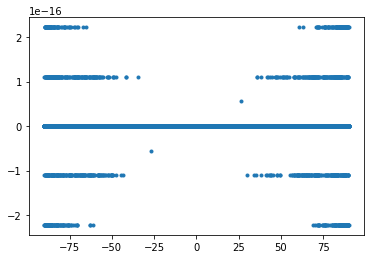

In [6]:
sinfs = numpy.frompyfunc( sin_forward_series, 1, 1)
sinrs = numpy.frompyfunc( sin_reverse_series, 1, 1)
sinrf = numpy.frompyfunc( sin_reverse_series_fixed, 1, 1)
sinrp = numpy.frompyfunc( sin_reverse_precomputed, 1, 1)
x = numpy.linspace(-numpy.pi/2,numpy.pi/2,1024*128)
d = sinrf( x ) - sinrs( x )
plt.plot(x/numpy.pi*180, d+0/numpy.sin(x),'.');
numpy.count_nonzero( d ), numpy.abs( d/numpy.sin(x) ).max()

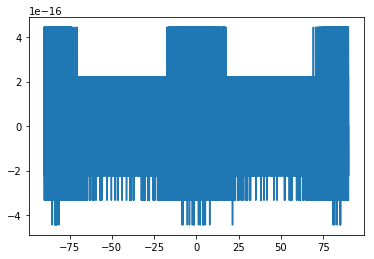

In [13]:
y = ( sinrf( x )**2 + sinrf( x + numpy.pi/2 )**2 ) - 1.
plt.plot( x*180/numpy.pi, y )